# ECXAS: A data aggregation tool for battery study in ROCK beamline

As part of the European project BIG-MAP (Battery Interface Genome Materials Accelerated Platform, www.big-map.eu) a need for semi-automated data processing was identified during the acquisition of data from beamlines, coupled with electrochemical equipment for example. In the current state, these data arrive out of sync (for example time series of absorption spectroscopy and electrochemical potential during a charge-discharge cycle of a battery), which makes their representation complex. There therefore appears the need for a tool for aggregating asynchronous data and generating maps with a homogeneous appearance.

## The ROCK case - an example

Here we present an example of an operando XAS experiment done on an electrochemistry cell developed by Dr. Gilles Moehl. The characteristics of the cell were as follows:

* Diamond peek-mak: LNO BASF/Celgard/Lithium, 28uL LP57, 4.5 bar pressure
* C=225 mAh
* 3-4.3 V vs lithium

Cycling protocol:
* 2 cycles at C/10 + 2 cycles at C/4
* 2 EC Lab files to merge.
* Total duration ≈ 50h

XAS acquisition protocol:
* Measured the evolution of the Ni K-edge
* 2 spectra taken at two different positions of the cell (duration ≈ 2 min) every 15 mins approximately
* Total spectra = 458

# TOC:
#### 0. [Import the necessary python libraries](#zero-main)
#### 1. [The electrochemistry data](#first-main)
##### &emsp; 1.1 [Importing the EC data](#first-sec-one)
##### &emsp; 1.2 [Basic visualization of the EC data](#first-sec-two)
#### 2. [The XAS data](#second-main)
##### &emsp; 2.1 [Importing the XAS data](#second-sec-one)
##### &emsp; 2.2 [Basic visualization of the XAS data](#second-sec-two)
#### 3. [Merging both dataframes (EC + XAS data) based on time](#third-main)
#### 4. [Additional visualization - evolution of the Ni K-edge position](#fourth-main)
#### 5. [Saving the data in a new txt file](#fifth-main)

## 0. Import the necessary python libraries <a class="anchor" id="zero-main"></a>

In [1]:
# basic libraries for maths and data treament
import numpy as np, pandas as pd, scipy as sp, os
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# developed package for EC - XAS data aggregation
from perex import ecxas

# some additional visualization options
%matplotlib inline
pd.set_option('display.max_columns', None)

## 1. The electrochemistry data <a class="anchor" id="first-main"></a>

### 1.1 Importing the EC data <a class="anchor" id="first-sec-one"></a>

#### Define the paths from the source files

In [2]:
# path(s) of the EC Lab file(s)
ec_path1 = 'operando/EC/220726cell4operandoxas_C06.mpt'
ec_path2 = 'operando/EC/220726cell4operandoxascontinuation_C06.mpt'

The `ecxas.getECdf` function serves to get a pandas dataframe from a classic EC Lab .mpt file. Note that we can join several EC lab files in one dataframe (e.g. maybe you had to stop your initial file to configure a parameter and start another one), you just need to specify the path for all.

**IMPORTANT!!** The "_Acquisition started on :_" line should be present at the header of the .mpt file. If it is not present, the code will not work (or you will have to give it yourself as an input parameter, e.g. `ecxas.getECdf(ec_path,acTime='m/d/Y H:M:S.f')`)

#### Import the EC file(s) to a pandas dataframe

In [3]:
EC_df = ecxas.getECdf(ec_path1,ec_path2)

EC dataframe ready.


Let's take a look at the first (or last) rows of our EC dataframe:

In [4]:
# EC_df.head(x) # to show the fist x lines
# EC_df.tail(x) # to show the last x lines
EC_df.head(5)

,filename,mode,ox/red,error,control_changes,Ns_changes,counter_inc.,Ns,time/s,dq/mA.h,(Q-Qo)/mA.h,control/V/mA,Ewe/V,I_Range,Q_charge/discharge/mA.h,half_cycle,P/W,<I>/mA,cycle_number,Energy_charge/W.h,Energy_discharge/W.h,Capacitance_charge/µF,Capacitance_discharge/µF,x,Q_discharge/mA.h,Q_charge/mA.h,Capacity/mA.h,Efficiency/%,control/V,control/mA,acquisition_datetime
0,220726cell4operandoxas_C06.mpt,3,1,0,0,0,0,0,0.0,0.0,0.0,0.0,3.491201,14,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,2022-07-26 22:38:30.190000000
1,220726cell4operandoxas_C06.mpt,3,1,0,0,0,0,0,1.0,0.0,0.0,0.0,3.491278,14,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,2022-07-26 22:38:31.189999975
2,220726cell4operandoxas_C06.mpt,3,1,0,0,0,0,0,2.0,0.0,0.0,0.0,3.491182,14,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,2022-07-26 22:38:32.189999949
3,220726cell4operandoxas_C06.mpt,3,1,0,0,0,0,0,3.0,0.0,0.0,0.0,3.491201,14,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,2022-07-26 22:38:33.189999924
4,220726cell4operandoxas_C06.mpt,3,1,0,0,0,0,0,4.0,0.0,0.0,0.0,3.491239,14,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,2022-07-26 22:38:34.189999899


Column names:

In [5]:
EC_df.columns

Index(['filename', 'mode', 'ox/red', 'error', 'control_changes', 'Ns_changes',
       'counter_inc.', 'Ns', 'time/s', 'dq/mA.h', '(Q-Qo)/mA.h',
       'control/V/mA', 'Ewe/V', 'I_Range', 'Q_charge/discharge/mA.h',
       'half_cycle', 'P/W', '<I>/mA', 'cycle_number', 'Energy_charge/W.h',
       'Energy_discharge/W.h', 'Capacitance_charge/µF',
       'Capacitance_discharge/µF', 'x', 'Q_discharge/mA.h', 'Q_charge/mA.h',
       'Capacity/mA.h', 'Efficiency/%', 'control/V', 'control/mA',
       'acquisition_datetime'],
      dtype='object')

Number of rows and columns:

In [6]:
EC_df.shape

(7735, 31)

#### Importing also the settings of the EC experiment to a pandas dataframe

Let's take a look at the parameters of the `ecxas.getECdf` function. You can either do it using the command `help(ecxas.getECdf)` or `ecxas.getECdf?`.

In [7]:
help(ecxas.getECdf)

Help on function getECdf in module perex.ecxas:

getECdf(*args, with_settings=0, acTime=1)
    Function to get a pandas dataframe from one or several EC Lab files (must have an .mpt extension).
    
    :*args: String(s) containing the complete path(s) of the file(s). Must be separated by commas.
    :with_settings: Default set to 0. Set to 1 if you want an additional dataframe with the settings that are written in the file header.
    :acTime: Usually, the EC Lab file has a line indicating when the acquisition started. If not, you must set it as a string with the format 'm/d/Y H:M:S.f'
    :return: Returns a pandas dataframe with the data from EC Lab file(s).



Note that it has a parameter called `'with_settings'` set to 0 by default. When it is set to 1, the function returns two dataframes instead of one: the first one containing the data and the second one with the settings of the EC experiment. Let's try.

In [8]:
EC_df, EC_settings_df = ecxas.getECdf(ec_path1,ec_path2,with_settings=1)

EC dataframe ready.


In [9]:
# the main dataframe
EC_df.tail()

,filename,mode,ox/red,error,control_changes,Ns_changes,counter_inc.,Ns,time/s,dq/mA.h,(Q-Qo)/mA.h,control/V/mA,Ewe/V,I_Range,Q_charge/discharge/mA.h,half_cycle,P/W,<I>/mA,cycle_number,Energy_charge/W.h,Energy_discharge/W.h,Capacitance_charge/µF,Capacitance_discharge/µF,x,Q_discharge/mA.h,Q_charge/mA.h,Capacity/mA.h,Efficiency/%,control/V,control/mA,acquisition_datetime
7730,220726cell4operandoxascontinuation_C06.mpt,1,0,0,0,0,1,6,34390.214952,-0.003212,1.746506,-0.385,4.152651,12,-0.019083,9,-0.001600,-0.385398,4.0,0.004618,0.000079,3.310375e+06,497608.048090,0.899089,0.019083,0.0,0.019083,0.00000,0.0,-0.385,2022-07-28 23:04:55.555952411
7731,220726cell4operandoxascontinuation_C06.mpt,1,0,0,0,0,1,6,34420.214952,-0.003212,1.743295,-0.385,4.152899,12,-0.022294,9,-0.001601,-0.385399,4.0,0.004618,0.000093,3.310375e+06,582404.507828,0.899091,0.022294,0.0,0.022294,0.00000,0.0,-0.385,2022-07-28 23:05:25.555952467
7732,220726cell4operandoxascontinuation_C06.mpt,1,0,0,0,0,1,6,34450.214953,-0.003212,1.740083,-0.385,4.153225,12,-0.025506,9,-0.001601,-0.385397,4.0,0.004618,0.000106,3.310375e+06,667879.683101,0.899092,0.025506,0.0,0.025506,0.00000,0.0,-0.385,2022-07-28 23:05:55.555952522
7733,220726cell4operandoxascontinuation_C06.mpt,1,0,0,0,0,1,6,34480.214953,-0.003212,1.736871,-0.385,4.153243,12,-0.028718,9,-0.001601,-0.385394,4.0,0.004618,0.000119,3.310375e+06,752080.820119,0.899094,0.028718,0.0,0.028718,0.00000,0.0,-0.385,2022-07-28 23:06:25.555952578
7734,220726cell4operandoxascontinuation_C06.mpt,1,0,0,0,0,1,6,34506.669153,-0.002832,1.734039,-0.385,4.153377,12,-0.031550,9,-0.001601,-0.385396,4.0,0.004618,0.000131,3.310375e+06,827052.052969,0.899095,0.031550,0.0,0.031550,2.68307,0.0,-0.385,2022-07-28 23:06:52.010152627


In [10]:
# the settings for each sequence
EC_settings_df.transpose()

,0,1,2,3,4,5,6
Ns,0,1,2,3,4,5,6
Set I/C,I,I,I,I,I,I,I
Is,0,154,-154,385,0,385,-385
unit Is,mA,µA,µA,µA,mA,µA,µA
vs.,<None>,<None>,<None>,<None>,<None>,<None>,<None>
N,1,1,1,1,1,1,1
I sign,> 0,> 0,> 0,> 0,> 0,> 0,> 0
t1 (h:m:s),0:00:0.0000,1000:00:0.0000,1000:00:0.0000,1000:00:0.0000,0:00:0.0000,1000:00:0.0000,1000:00:0.0000
I Range,100 µA,100 µA,100 µA,1 mA,1 mA,1 mA,1 mA
Bandwidth,5,5,5,5,5,5,5


#### Adding new columns

In this specific case, the `x` column had been poorly calculated due to a mistake in the input parameters. We add a new column called `calculated_x` based on the evolution of the charge compared to the charge from the beginning of the experiment. 

In [11]:
EC_df['calculated_x']=1-EC_df['(Q-Qo)/mA.h']/EC_df['(Q-Qo)/mA.h'].max()

### 1.2 Basic visualization of the EC data <a class="anchor" id="first-sec-two"></a>

#### Basic U/I vs. time curve

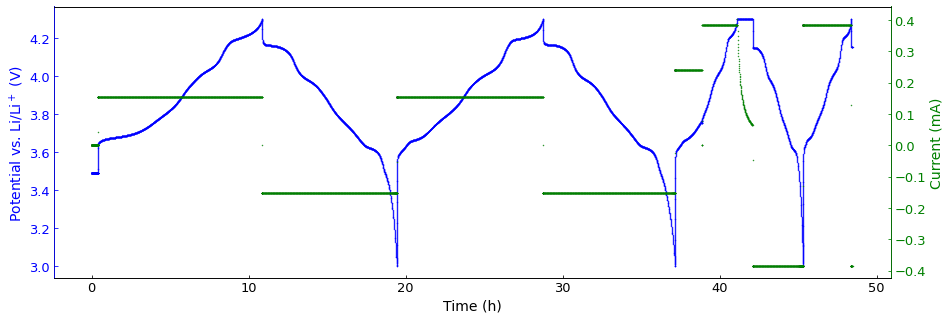

In [12]:
fig=ecxas.plot.UI_vs_t(EC_df);
# command to save your figure in png file (just change the extension if you want a jpg file)
# fig.savefig('figname.png', dpi=200, bbox_inches='tight') 

Note that you can modify the dimensions of the graph if desired.

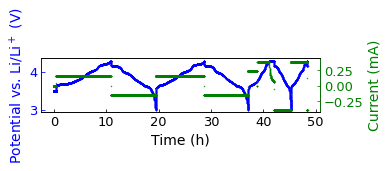

In [13]:
fig=ecxas.plot.UI_vs_t(EC_df, width=5, height=1);

#### Potential vs. capacity curve

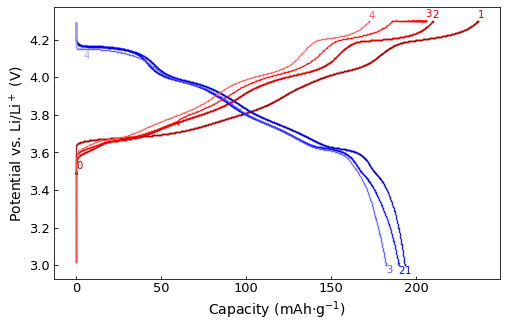

In [14]:
# mass of the cell
mass_cell4=4.44*1.54 # mass in mg
# plot
fig=ecxas.plot.U_vs_capacity(EC_df,mass=mass_cell4);

#### dQdV vs. potential curve

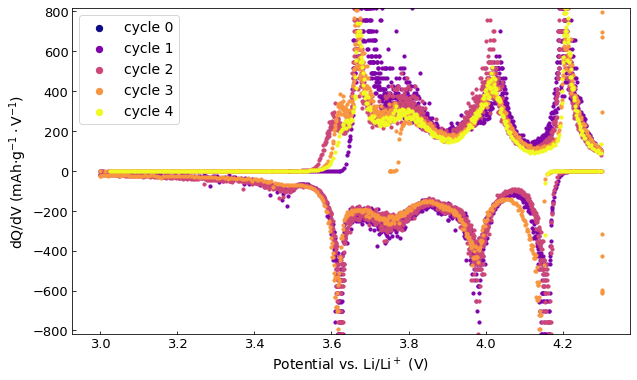

In [15]:
fig=ecxas.plot.dQdU_vs_U(EC_df,mass=mass_cell4);

Note that the `ecxas.plotdQdU_vs_U` function has additional parameters to apply a smoothing filter. For example, a moving average window (boxcar).

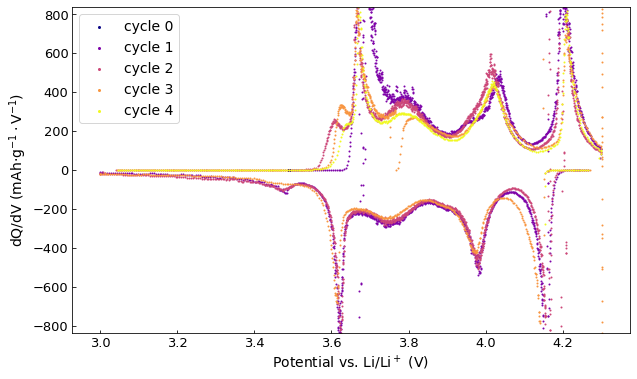

In [16]:
# same but using ecxas library
fig=ecxas.plot.dQdU_vs_U(EC_df,mass=mass_cell4,boxcar=5,dotsize=1);

You can plot only one cycle if you want to.

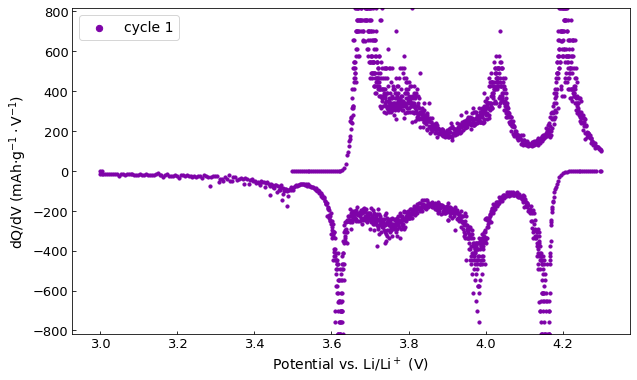

In [17]:
fig=ecxas.plot.dQdU_vs_U(EC_df,mass=mass_cell4,nb_cycle=1);

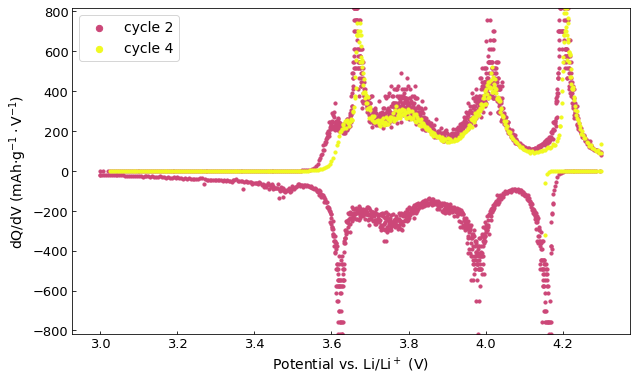

In [18]:
fig=ecxas.plot.dQdU_vs_U(EC_df,mass=mass_cell4,nb_cycle=[2,4]);

## 2. The XAS data <a class="anchor" id="second-main"></a>

### 2.1 Importing the XAS data <a class="anchor" id="second-sec-one"></a>

Let's define the folder containing the XAS files. It is better if they are already normalized.

In [19]:
# subfolder containing the XAS files
XAS_folder = 'operando/XAS_normalized'

The `ecxas.getXASfilesdf` function builds a pandas dataframe from a list of XAS .txt files. They can be either raw or normalized. You can set the parameter `filter` to filter your files using some keywords.

As an example, in this case, we only want the filenames containing the words 'cell4' and 'norm'

In [20]:
XAS_df = ecxas.getXASdf(XAS_folder,filters=['cell4','norm'])
XAS_df.head(3)

Finished file filtering.
All files loaded.
XAS dataframe ready.


,filename,start_time,elapsed_time/s,sample_T_(C),E0,E_shift,E0_pivot,I_jump_at_E0_pivot,shifted_energy,normalized,reference,ref.derivative,I0,stop_time,absolute_time/s
0,norm_op2_cell4_pos1_dq1_0001_av240_00001.txt,2022-07-26 23:01:58.055,65.003890,NaN,8332.88,0.036225,8349.6,0.799210,"[8060.0, 8065.0, 8070.0, 8075.0, 8080.0, 8085....","[0.0007013665, 0.0007013665, 0.000420372, 0.00...","[1.034688, 1.034688, 1.032234, 1.029816, 1.027...","[-0.0004794574, -0.0004794574, -0.0004590088, ...","[14959.65, 14959.65, 14984.36, 15007.22, 15030...",2022-07-26 23:03:03.058889607,65.003890
1,norm_op2_cell4_pos2_dq1_0001_av240_00001.txt,2022-07-26 23:04:36.969,64.810888,NaN,8332.88,-0.200001,8349.6,0.724352,"[8060.0, 8065.0, 8070.0, 8075.0, 8080.0, 8085....","[0.002439815, 0.001902658, 0.001924003, 0.0027...","[1.037278, 1.034635, 1.032342, 1.030151, 1.028...","[-0.0005300965, -0.0004941115, -0.0004601611, ...","[14940.73, 14960.38, 14984.8, 15008.35, 15030....",2022-07-26 23:05:41.779887568,223.724888
2,norm_op2_cell4_pos1_dq1_0002_av240_00001.txt,2022-07-26 23:13:25.071,64.648484,NaN,8332.88,-0.200000,8349.6,0.799364,"[8060.0, 8065.0, 8070.0, 8075.0, 8080.0, 8085....","[0.001061746, 0.0006462266, 0.0003920815, 0.00...","[1.037053, 1.034567, 1.032537, 1.030004, 1.027...","[-0.0004992696, -0.000451855, -0.0004608255, -...","[14938.81, 14959.35, 14984.13, 15007.21, 15029...",2022-07-26 23:14:29.719483797,751.664484


Notice that some of the columns contain arrays of data (e.g. shifted_energy, normalized, ref.derivative, I0...) from the corresponding txt filename. The `absolutime_time/s` column is calculated using the `start_time` of the first raw as t=0 and adding the `elapsed_time/s`.

In [22]:
XAS_df.shape

(458, 15)

458 files where loaded in the dataframe.

### 2.2 Basic visualization of the XAS data <a class="anchor" id="second-sec-two"></a>

These are some basic visualization tools for XAS data alone. Note that whenever you put the `%matplotlib notebook` at the **beginning** of a cell, the graphs become interactive. If you want to go back to the normal non-interactive mode, use `%matplotlib inline`.

<IPython.core.display.Javascript object>


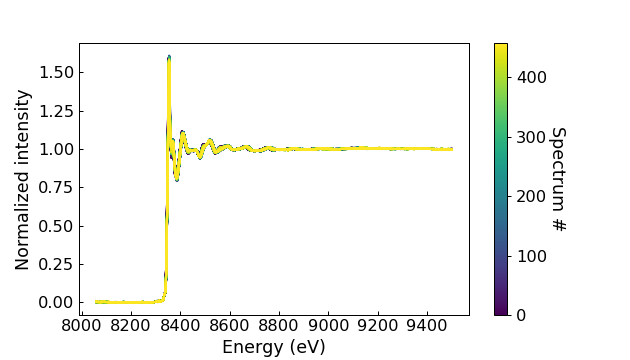

In [30]:
%matplotlib notebook
fig=ecxas.plot.all_XAS(XAS_df,colormap='viridis');

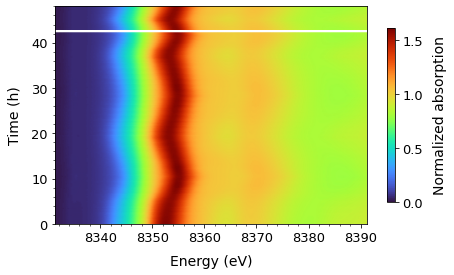

In [24]:
%matplotlib inline
# now in a 2D image
fit=ecxas.plot.XAS_vs_t_2D(XAS_df,colormap='turbo');

<IPython.core.display.Javascript object>


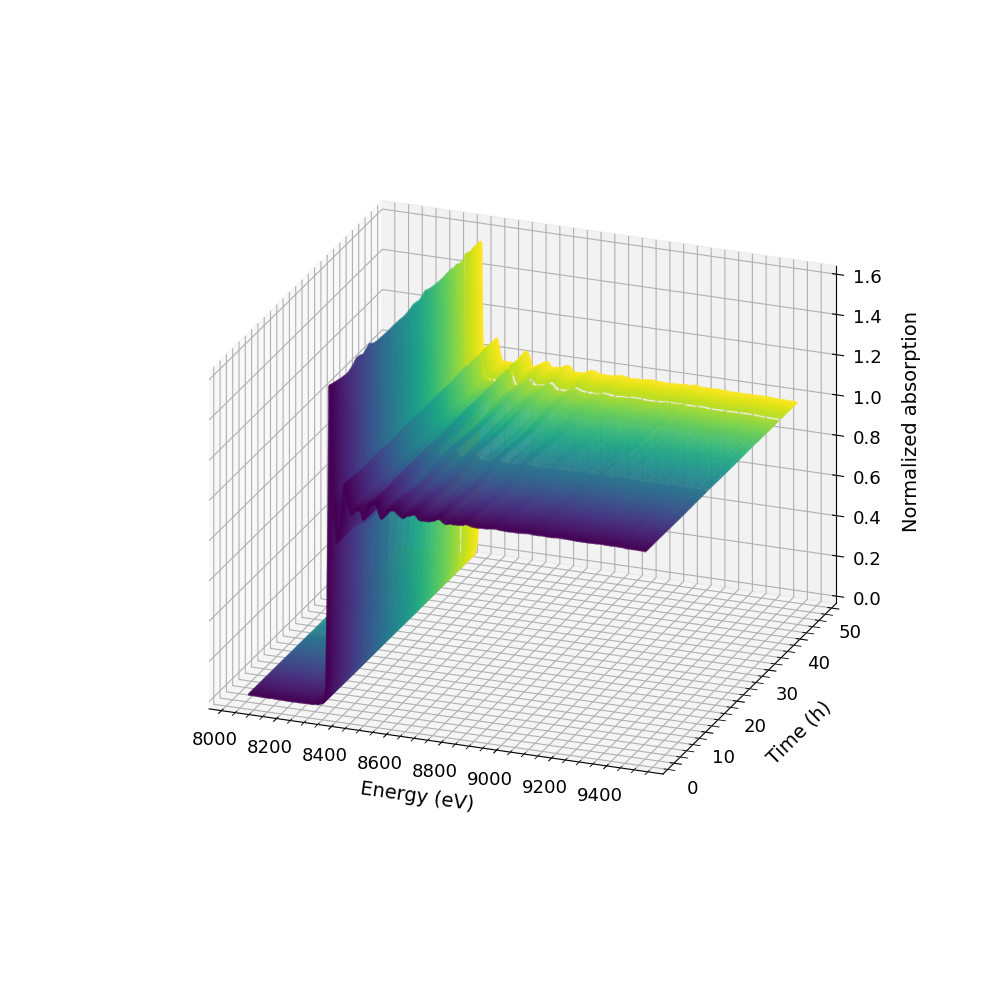

In [31]:
%matplotlib notebook
# now in a 3D map
fit=ecxas.plot.XAS_vs_t_3D(XAS_df,colormap='viridis');

## 3. Merging both dataframes (EC + XAS data) based on time <a class="anchor" id="third-main"></a>

The `ecxas.merge_dfs` function serves to merge two dataframes based on time: one with the electrochemical (or Raman) data and one with the list of the XAS files. The merge is based on time, with a tolerance of up to 10 minutes by default. The tolerance parameter can be set to be less.

**NOTE:** The dataframe containing the XAS data should always be the second input parameter.

In [26]:
output_df = ecxas.merge_dfs(EC_df,XAS_df)

Merged dataframe ready.


Here is the new dataframe containing both spectroscopic and chosen electrochemical data:

In [36]:
output_df.head(3)

,filename_XAS,start_time_XAS,elapsed_time/s_XAS,sample_T_(C)_XAS,E0_XAS,E_shift_XAS,E0_pivot_XAS,I_jump_at_E0_pivot_XAS,shifted_energy_XAS,normalized_XAS,reference_XAS,ref.derivative_XAS,I0_XAS,stop_time_XAS,absolute_time/s_XAS,filename_EC,mode_EC,ox/red_EC,error_EC,control_changes_EC,Ns_changes_EC,counter_inc._EC,Ns_EC,time/s_EC,dq/mA.h_EC,(Q-Qo)/mA.h_EC,control/V/mA_EC,Ewe/V_EC,I_Range_EC,Q_charge/discharge/mA.h_EC,half_cycle_EC,P/W_EC,<I>/mA_EC,cycle_number_EC,Energy_charge/W.h_EC,Energy_discharge/W.h_EC,Capacitance_charge/µF_EC,Capacitance_discharge/µF_EC,x_EC,Q_discharge/mA.h_EC,Q_charge/mA.h_EC,Capacity/mA.h_EC,Efficiency/%_EC,control/V_EC,control/mA_EC,acquisition_datetime_EC,calculated_x_EC,dQdV_EC,absolute_time/s_EC
0,norm_op2_cell4_pos1_dq1_0001_av240_00001.txt,2022-07-26 23:01:58.055,65.003890,NaN,8332.88,0.036225,8349.6,0.799210,"[8060.0, 8065.0, 8070.0, 8075.0, 8080.0, 8085....","[0.0007013665, 0.0007013665, 0.000420372, 0.00...","[1.034688, 1.034688, 1.032234, 1.029816, 1.027...","[-0.0004794574, -0.0004794574, -0.0004590088, ...","[14959.65, 14959.65, 14984.36, 15007.22, 15030...",2022-07-26 23:03:03.058,65.003890,220726cell4operandoxas_C06.mpt,1,1,0,1,0,0,1,1487.135562,0.001283,0.004714,0.154,3.643116,13,0.004714,2,0.000561,0.153949,1.0,0.000017,0.0,116777.352412,0.0,0.899998,0.0,0.004714,0.004714,0.0,0.0,0.154,2022-07-26 23:03:17.325,0.997433,94.416988,79.270562
1,norm_op2_cell4_pos2_dq1_0001_av240_00001.txt,2022-07-26 23:04:36.969,64.810888,NaN,8332.88,-0.200001,8349.6,0.724352,"[8060.0, 8065.0, 8070.0, 8075.0, 8080.0, 8085....","[0.002439815, 0.001902658, 0.001924003, 0.0027...","[1.037278, 1.034635, 1.032342, 1.030151, 1.028...","[-0.0005300965, -0.0004941115, -0.0004601611, ...","[14940.73, 14960.38, 14984.8, 15008.35, 15030....",2022-07-26 23:05:41.779,223.724888,220726cell4operandoxas_C06.mpt,1,1,0,1,0,0,1,1637.135559,0.001283,0.011129,0.154,3.648829,13,0.011129,2,0.000562,0.153949,1.0,0.000041,0.0,265252.943214,0.0,0.899994,0.0,0.011129,0.011129,0.0,0.0,0.154,2022-07-26 23:05:47.325,0.993940,251.744255,229.270559
2,norm_op2_cell4_pos1_dq1_0002_av240_00001.txt,2022-07-26 23:13:25.071,64.648484,NaN,8332.88,-0.200000,8349.6,0.799364,"[8060.0, 8065.0, 8070.0, 8075.0, 8080.0, 8085....","[0.001061746, 0.0006462266, 0.0003920815, 0.00...","[1.037053, 1.034567, 1.032537, 1.030004, 1.027...","[-0.0004992696, -0.000451855, -0.0004608255, -...","[14938.81, 14959.35, 14984.13, 15007.21, 15029...",2022-07-26 23:14:29.719,751.664484,220726cell4operandoxas_C06.mpt,1,1,0,1,0,0,1,2147.135546,0.001283,0.032938,0.154,3.658403,13,0.032938,2,0.000563,0.153949,1.0,0.000120,0.0,738292.700979,0.0,0.899983,0.0,0.032938,0.032938,0.0,0.0,0.154,2022-07-26 23:14:17.325,0.982062,545.738868,739.270546


Let's take a look at the 3D plot again. This time it will include a new color code taking into account the charge-discharge cycling.

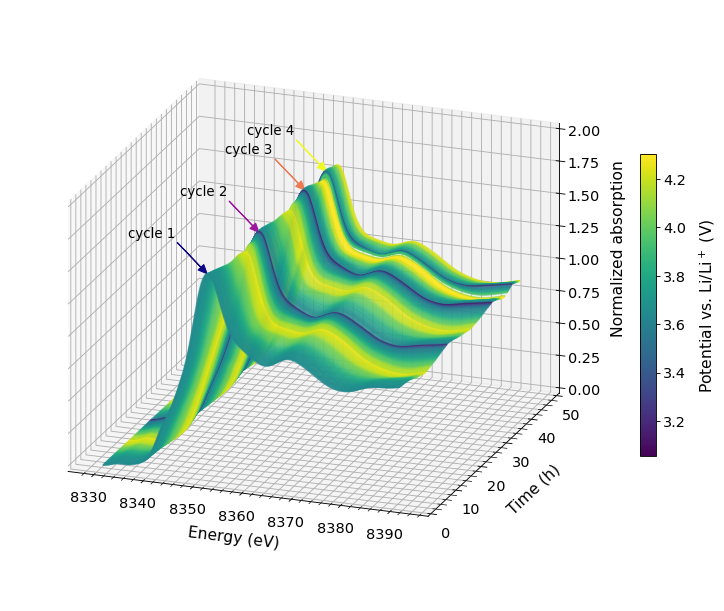

In [34]:
%matplotlib inline
ecxas.plot.XAS_vs_t_3D(output_df);

You can choose a different energy range and remove the arrow indicating the start of a cycle.

<IPython.core.display.Javascript object>


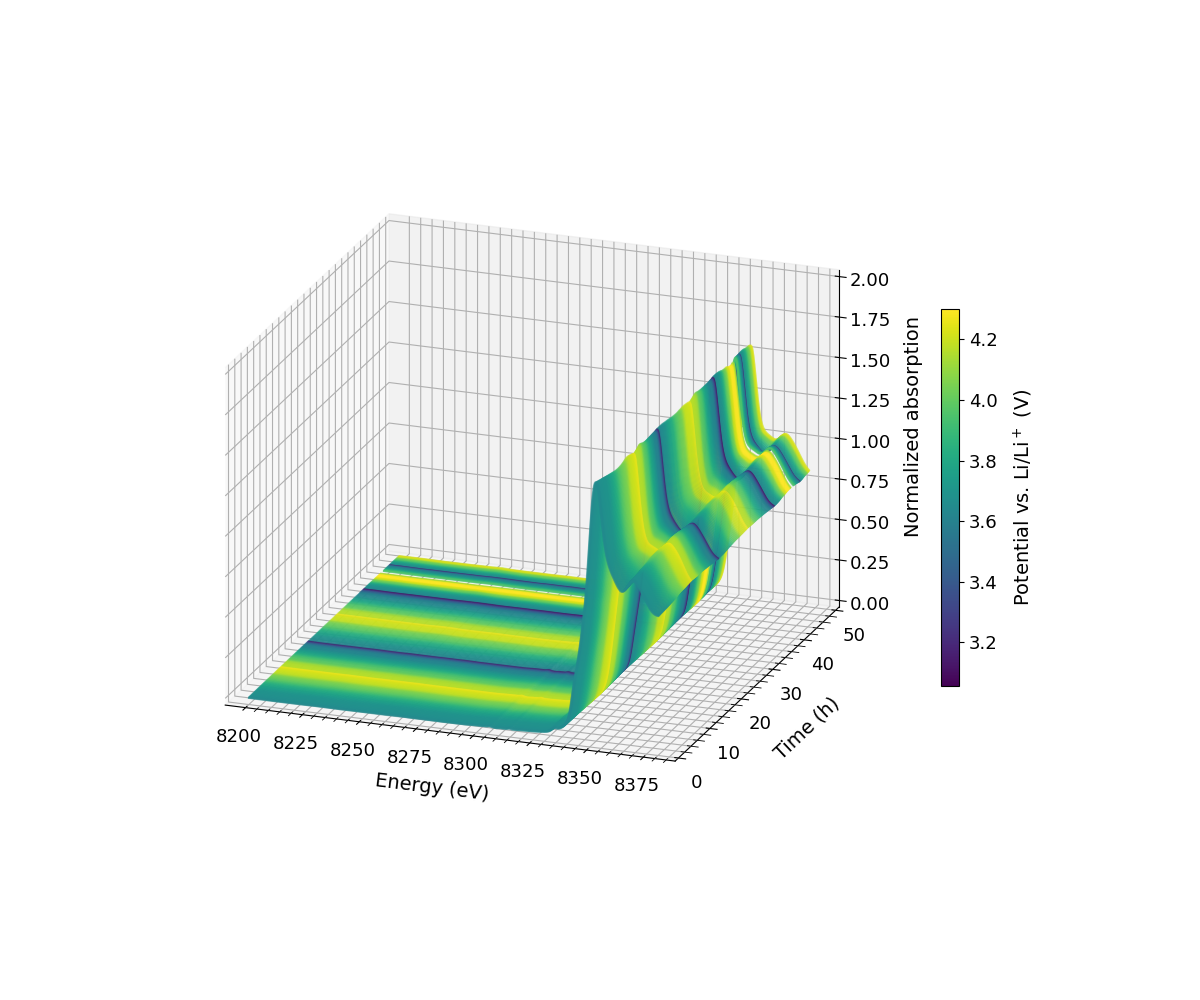

In [32]:
ecxas.plot.XAS_vs_t_3D(output_df,plot_range=[8200,8380],arrows_cycles=False);

/home/experiences/rock/com-rock/.local/lib/python3.9/site-packages/perex-5.1.0-py3.9.egg/perex/plot.py:1995: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/experiences/rock/com-rock/.local/lib/python3.9/site-packages/perex-5.1.0-py3.9.egg/perex/plot.py:1995: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


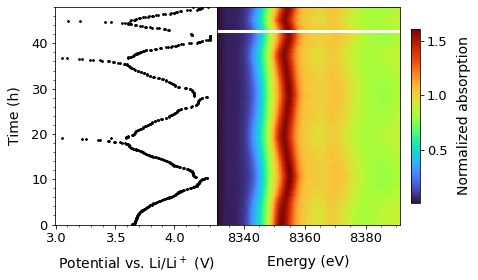

In [48]:
# also let's check the 2D intensity plot over time, now accompanied by the evolution of the potential
ecxas.plot.XAS_vs_t_2D(output_df,colormap='turbo');

## 4. Additional visualization - evolution of the Ni K-edge position <a class="anchor" id="fourth-main"></a>

In [36]:
# set a J value for the edge
Jval=0.7

#### Against potential

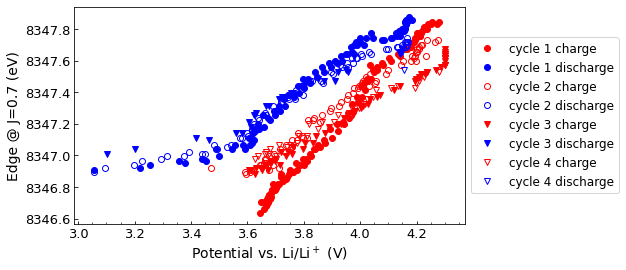

In [37]:
# we can plot the evolution of the Ni K-edge position vs potential
ecxas.plot.Eshift_vs_U(output_df,edge_intensity=Jval);

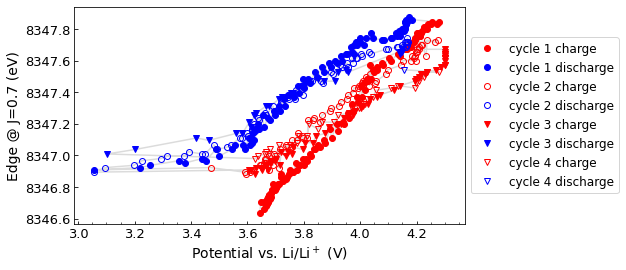

In [38]:
ecxas.plot.Eshift_vs_U(output_df,edge_intensity=Jval,guideline=True);

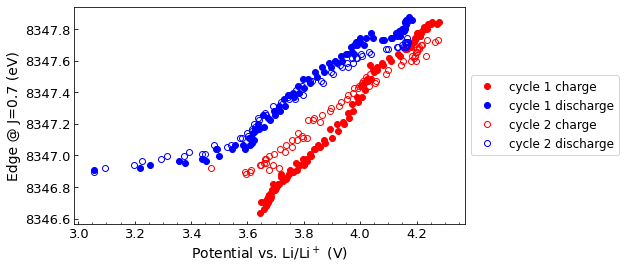

In [39]:
# let's plot the first 2 cycles (C/10)
ecxas.plot.Eshift_vs_U(output_df,edge_intensity=Jval,nb_cycle=[1,2]);

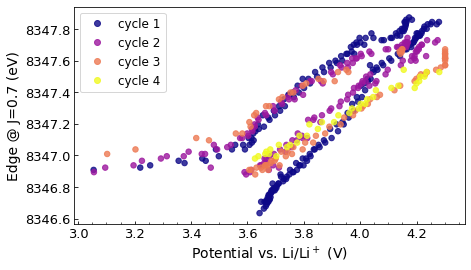

In [40]:
ecxas.plot.Eshift_vs_U(output_df,option=2,edge_intensity=Jval);

/home/experiences/rock/com-rock/.local/lib/python3.9/site-packages/perex-5.1.0-py3.9.egg/perex/plot.py:665: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


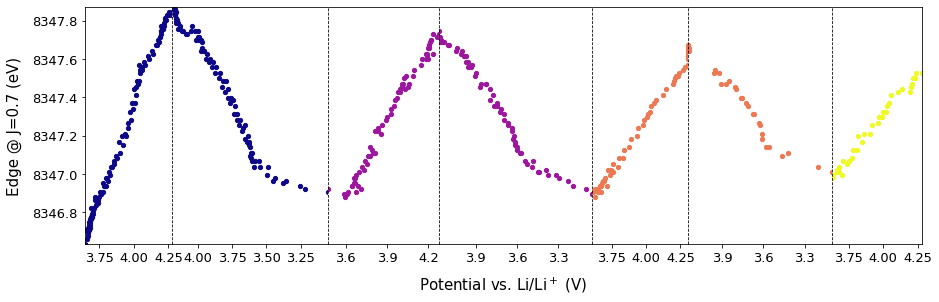

In [41]:
ecxas.plot.Eshift_vs_U(output_df,edge_intensity=Jval,option=3);

#### Against time

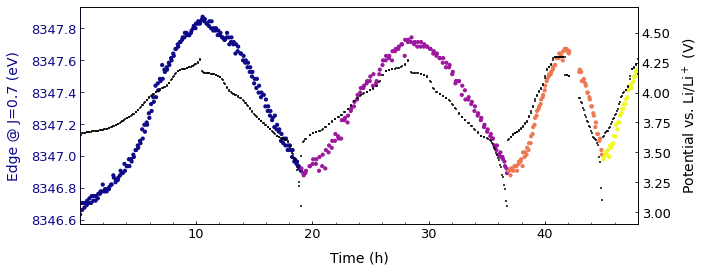

In [42]:
ecxas.plot.Eshift_vs_t(output_df,edge_intensity=Jval,width=10,height=4,option=2);

#### Against x

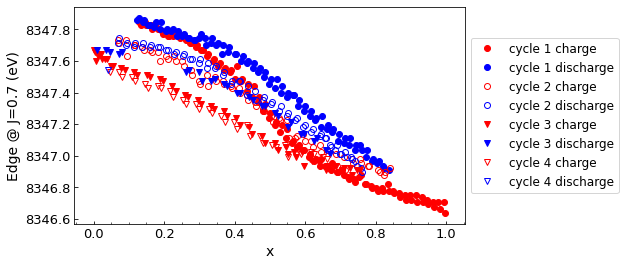

In [43]:
ecxas.plot.Eshift_vs_x(output_df,edge_intensity=Jval);

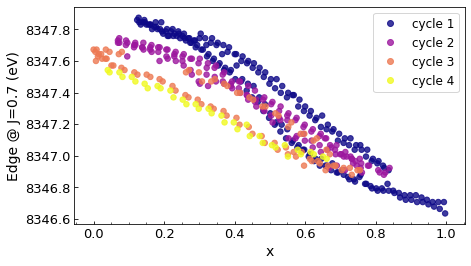

In [44]:
ecxas.plot.Eshift_vs_x(output_df,edge_intensity=Jval,option=2);

/home/experiences/rock/com-rock/.local/lib/python3.9/site-packages/perex-5.1.0-py3.9.egg/perex/plot.py:967: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


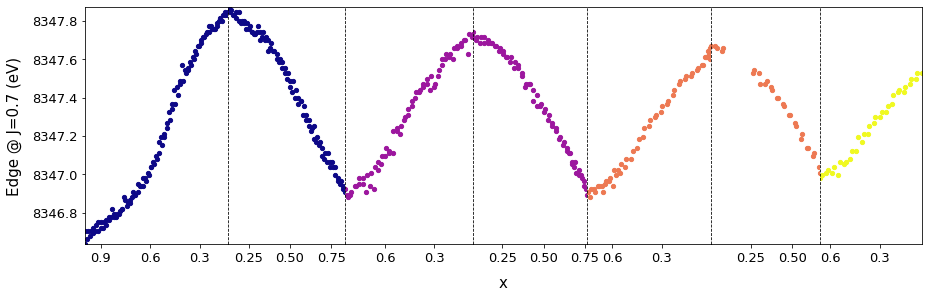

In [45]:
fig=ecxas.plot.Eshift_vs_x(output_df,edge_intensity=0.7,option=3);

## 5. Saving the data in a new txt file <a class="anchor" id="fifth-main"></a>

Here, we use the `ecxas.get_edge` function to add a new column in the `output_df` dataframe with the energy position of the edge for a specific J (in this case 0.7).

In [49]:
# let's set a J value
Jval=0.7

In [50]:
# define the new column
# the only two parameters for the ecxas.get_edge are the name of the pandas dataframe and the J value
# if no J value is given, the inflection point is taken by default
output_df['edge_at_J='+str(Jval)+'/eV']=ecxas.get_edge(output_df,Jval)

In [51]:
# save the dataframe to a txt file
# you can choose the columns you want to save
cols = ['filename_XAS','Ewe/V_EC','absolute_time/s_EC','edge_at_J='+str(Jval)+'/eV']

# save a txt file with just the columns that you want
output_df[cols].to_csv('output_file_partial.txt', index=False, sep='\t')

# save a txt file with all the columns
output_df.to_csv('output_file_complete.txt', index=False, sep='\t')

print('Output file succesfully created!')

Output file succesfully created!
